In [ ]:
#import libraries
import pandas as pd
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt


In [ ]:
#Connect to Google drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unzip the zipped dataset CData.zip on Google Drive
!unzip /content/drive/MyDrive/Dataset/Emotion/CData1.zip

Archive:  /content/drive/MyDrive/Dataset/Emotion/CData1.zip
   creating: CData1/
  inflating: CData1/boy1_happy.aac   
  inflating: CData1/boy2_happy .aac  
  inflating: CData1/Epaphras_1_depression.wav  
  inflating: CData1/Epaphras_1_Happy.wav  
  inflating: CData1/Epaphras_2_depression(1).wav  
  inflating: CData1/Epaphras_2_depression.wav  
  inflating: CData1/Epaphras_2_happy.wav  
  inflating: CData1/Epaphras_3_depression.wav  
  inflating: CData1/Epaphras_3_happy.wav  
  inflating: CData1/Epaphras_4_depression.wav  
  inflating: CData1/Epaphras_5_depression.wav  
  inflating: CData1/Epaphras_6_depression.wav  
  inflating: CData1/Epaphras_7_depression(1).wav  
  inflating: CData1/Epaphras_7_depression.wav  
  inflating: CData1/essien_1_depression(1).wav  
  inflating: CData1/essien_1_depression(2).wav  
  inflating: CData1/essien_1_depression.wav  
  inflating: CData1/essien_2_depression.wav  
  inflating: CData1/essien_3_depression.wav  
  inflating: CData1/hgg_happy.aac    
  

In [ ]:
#Displaying the audio files data after unzipping
import os
namelist = os.listdir('CData1')
namelist

['TJohn_11_Happiness.wav',
 'Peace_2_Sad.wav',
 'Isaiah_19_NonDepressed.wav',
 'Peace_10_Happy.wav',
 'Peace_7_Happy.wav',
 'Moses1_happy.aac',
 'Kenny_12_Depression.wav',
 'TJohn_8_Depressed.wav',
 'Peace_11_Happy.wav',
 'essien_3_depression.wav',
 'Isaiah_13_Depressed.wav',
 'TJohn_6_Depression.wav',
 'Peace_1_Happy.wav',
 'victory_happy.aac',
 'TJohn_9_Depression.wav',
 'Peace_8_Happy.wav',
 'sam1_happy.aac',
 'TJohn_1_Depression.wav',
 'Kenny_14_Depression.wav',
 'Kenny_1_Happiness.wav',
 'Peace_4_Happy.wav',
 'Kenny_11_Depression.wav',
 'Peace_5_Sad.wav',
 'TJohn_12_Depression.wav',
 'Epaphras_3_happy.wav',
 'Peace_8_depressed.wav',
 'Recording_1.wav',
 'promise3_happy.aac',
 'Isaiah_10_NonDepressed.wav',
 'jethro_happy.aac',
 'Kenny_10_Depression.wav',
 'Epaphras_1_depression.wav',
 'sha2_happy.aac',
 'Peace_6_Sad.wav',
 'Isaiah_18_NonDepressed.wav',
 'Kenny_2_Happiness.wav',
 'ransom_11_depression.wav',
 'Epaphras_3_depression.wav',
 'Kenny_15_Depression.wav',
 'promise2_happy.a

In [ ]:
#Target Labelling
target = []
id = []
for name in namelist:
  if 'nond' in name.lower(): #identify nondepressed from the dataset and label it - 1
    id.append(name)
    target.append("1")
  elif 'sad' in name.lower():#identify 'sad' from the dataset and label it - 0
    id.append(name)
    target.append("0")
  elif 'de' in name.lower(): #identify depressed from the dataset and label it - 1
    id.append(name)
    target.append("0")
  else:
    id.append(name)
    target.append("1")

In [ ]:
#print out the number of items in the dataset
len(id),len(target)

(132, 132)

In [ ]:
#Using a python dictionary to create a panda DataFrame for easy manipulation and accessibility
d = {'id': id, 'target': target}
df = pd.DataFrame(data=d)

In [ ]:
df

,id,target
0,TJohn_11_Happiness.wav,1
1,Peace_2_Sad.wav,0
2,Isaiah_19_NonDepressed.wav,1
3,Peace_10_Happy.wav,1
4,Peace_7_Happy.wav,1
...,...,...
127,Kenny_17_Depression.wav,0
128,sha_happy.aac,1
129,TJohn_3_Happiness.wav,1
130,sha3_happy.aac,1


In [ ]:
#save and download a copy of the target dataFrame for possible reference purpose
df.to_csv('target.csv')

In [ ]:
#prints details of a single dataset
csvData = pd.read_csv('target.csv')
print(csvData.iloc[0, :])

Unnamed: 0                         0
id            TJohn_11_Happiness.wav
target                             1
Name: 0, dtype: object


In [ ]:
#This is to confirm the audio content of a single data
import IPython.display as ipd

ipd.Audio('/content/CData/Epaphras_1_depression.wav')

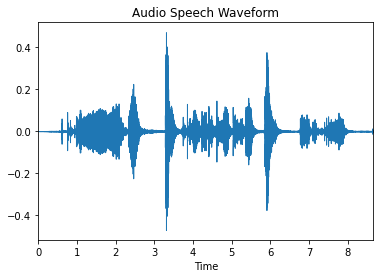

In [ ]:
#Using Matplotlib to plot the signal wave of the audio
plt.clf()
plt.title("Audio Speech Waveform")
data, sample_rate=librosa.load("/content/CData1/Epaphras_2_depression(1).wav")
librosa.display.waveplot(data, sr=sample_rate)
    # plt.savefig("outputs/{}.png".format(label))
plt.show()

In [ ]:
#MFCCs feature extraction of a single audio file
path=df["target"]
audio, sr=librosa.load("/content/CData/Epaphras_1_depression.wav")
mfccs=librosa.feature.mfcc(audio, sr, n_mfcc=7)
mfccs.shape

(7, 674)

In [ ]:
# Helper function to generate mfccs for all the audio files
def extract_mfcc(path):
    audio, sr=librosa.load(path)
    mfccs=librosa.feature.mfcc(audio, sr, n_mfcc=7)
    return np.mean(mfccs.T, axis=0)

In [ ]:
# Extracting the MFCCs of all the audio files
features=[]
labels=[]
for i in range(len(df)):
    filename=df["id"].iloc[i]
    path="/content/CData1/{0}".format(filename)
    mfccs=extract_mfcc(path)
    features.append(mfccs)
    labels.append(int(df["target"].iloc[i]))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
#Converting the list to pandas DataFrame
data = pd.DataFrame(features)

In [ ]:
#Preparing for division into train and test set
from sklearn.model_selection import train_test_split
X = data.copy()
y = labels.copy()

In [ ]:
#A total of 100 audio files is selected to run the model
X = X.iloc[:130]
y = y[:130]

In [ ]:
 #Division of dataset into train and test dataset
 #33% test data set
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

In [ ]:
X_train

,0,1,2,3,4,5,6
118,-377.019226,16.976841,-15.699372,10.613695,-27.380936,-13.127826,-15.706789
74,-480.034149,73.611496,35.259541,22.387278,13.361959,3.983616,1.386619
122,-487.275085,96.017891,44.200722,30.393206,20.230602,7.613644,1.788884
110,-327.896973,82.457321,-24.220894,34.958015,-18.122883,-18.725965,1.605744
99,-467.659271,33.111282,-1.656546,20.529840,-9.118762,1.313356,-11.009176
...,...,...,...,...,...,...,...
23,-481.373871,33.525272,-13.540251,15.674201,0.426785,19.759525,1.018488
12,-413.024200,-1.338572,-9.932346,40.279964,-22.272823,23.419836,-19.517700
116,-416.381500,76.188873,24.836378,2.364594,-2.389121,9.247961,-5.584042
45,-473.551666,52.001820,29.680979,19.299784,8.692419,7.210133,0.155851


In [ ]:
!pip install catboost

In [ ]:
import xgboost as xg
xgb = xg.XGBClassifier(random_state = 34)
xgb.fit(X_train, y_train)

# Make predictions
predsxgb = xgb.predict(X_test)

# Score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(accuracy_score(y_test, predsxgb))
print(classification_report(y_test,predsxgb))
print(confusion_matrix(y_test,predsxgb))

0.8604651162790697
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.86      0.86      0.86        22

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.86      0.86      0.86        43

[[18  3]
 [ 3 19]]


In [ ]:
import lightgbm as lg
lgb = lg.LGBMClassifier(random_state = 34)
lgb.fit(X_train, y_train)

# Make predictions
predslgb = lgb.predict(X_test)

# Score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, predslgb))
print(classification_report(y_test,predslgb))
print(confusion_matrix(y_test,predslgb))

0.8604651162790697
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.86      0.86      0.86        22

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.86      0.86      0.86        43

[[18  3]
 [ 3 19]]


In [ ]:
#Data Modelling with Catboost-ensemle
import catboost as cbt
cbt = cbt.CatBoostClassifier(random_state = 34,verbose = 1000)
cbt.fit(X_train, y_train)

# Make predictions
predscbt = cbt.predict(X_test)

# Score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, predscbt))
print(classification_report(y_test,predscbt))
print(confusion_matrix(y_test,predscbt))

Learning rate set to 0.003632
0:	learn: 0.6906391	total: 1.87ms	remaining: 1.87s
999:	learn: 0.0650817	total: 1.07s	remaining: 0us
0.8837209302325582
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.87      0.91      0.89        22

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.88      0.88      0.88        43

[[18  3]
 [ 2 20]]


In [ ]:
#Data Modelling with Catboost-ensemle
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train, y_train)

# Make predictions
predsvc = svc.predict(X_test)

# Score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, predsvc))
print(classification_report(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))

0.7906976744186046
              precision    recall  f1-score   support

           0       0.71      0.95      0.82        21
           1       0.93      0.64      0.76        22

    accuracy                           0.79        43
   macro avg       0.82      0.79      0.79        43
weighted avg       0.83      0.79      0.79        43

[[20  1]
 [ 8 14]]


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
predlr = lr.predict(X_test)

# Score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, predlr))
print(classification_report(y_test,predlr))
print(confusion_matrix(y_test,predlr))

0.8837209302325582
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.90      0.86      0.88        22

    accuracy                           0.88        43
   macro avg       0.88      0.88      0.88        43
weighted avg       0.88      0.88      0.88        43

[[19  2]
 [ 3 19]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Make predictions
predrfc = rfc.predict(X_test)

# Score
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test, predrfc))
print(classification_report(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))

0.8604651162790697
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.86      0.86      0.86        22

    accuracy                           0.86        43
   macro avg       0.86      0.86      0.86        43
weighted avg       0.86      0.86      0.86        43

[[18  3]
 [ 3 19]]


In [ ]:
#Function for making a single prediction
def predict_one(path):
  input = []
  plt.clf()
  plt.title("sfasd")
  data, sample_rate=librosa.load(path)
  librosa.display.waveplot(data, sr=sample_rate)
  plt.show()
  import IPython.display as ipd

  ipd.Audio(path)
  audio, sr=librosa.load(path)
  mfccs=librosa.feature.mfcc(audio, sr, n_mfcc=7)
  input.append(np.mean(mfccs.T, axis=0))
  print(pd.DataFrame(input))
  print(cbt.predict_proba(pd.DataFrame(input)))
  print(cbt.predict(pd.DataFrame(input)))

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


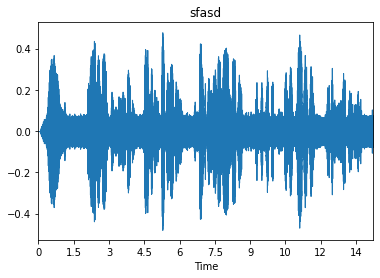

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


            0          1         2         3          4          5          6
0 -160.874573  73.316772  8.847918  15.83791 -18.472507  17.540459 -19.937971
[[0.02989088 0.97010912]]
[1]


In [ ]:
#predicting for a single audio file with 'path' input parameter
predict_one("/content/CData1/sha3_happy.aac")

In [ ]:
import IPython.display as ipd
ipd.Audio("/content/CData/Kenny_4_Happiness.wav")

In [ ]:
X_test

,0,1,2,3,4,5,6
20,-416.381500,76.188873,24.836378,2.364594,-2.389121,9.247961,-5.584042
90,-500.723724,42.603249,-4.276566,7.492264,-10.584032,-0.043411,3.708301
34,-463.169098,65.173012,-50.965900,-8.420075,-4.776583,2.704205,-4.098946
51,-472.513489,53.824905,16.718292,15.319113,7.210909,9.685427,5.210553
8,-383.695953,102.160919,-4.913388,32.926594,-22.336319,20.655378,-13.329935
73,-396.442535,88.273529,4.036090,24.414436,-10.449677,5.110944,0.454019
21,-486.041534,77.491943,11.922278,15.882981,5.470229,7.786796,2.891392
87,-401.340912,76.447098,-11.810198,11.532534,0.059310,6.765373,-7.573668
79,-383.695953,102.160919,-4.913388,32.926594,-22.336319,20.655378,-13.329935
88,-356.986298,65.805939,-15.368853,24.900030,10.547701,26.414341,-14.906061
